In [100]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
file_path = '/content/gdrive/MyDrive/MLP/school_dropout_sa_with_noise.csv'

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
raw_df = pd.read_csv(file_path)
raw_df.head()

,age,gender,province,urban_rural,household_income,parent_education,attendance,highest_grade,dropout
0,18,Male,North West,Urban,8931.49,Secondary,Yes,2,0
1,15,Female,Western Cape,Urban,-5000.00,Primary,Yes,9,0
2,5,Female,North West,Rural,4164.10,Secondary,Yes,8,0
3,18,Female,Northern Cape,Urban,11491.67,Primary,No,7,0
4,14,Female,Mpumalanga,Rural,13799.41,Secondary,Yes,2,0


In [110]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(raw_df,test_size=0.2,random_state=42)

**MANDATORY DATA INCONSISTENCIES CHECK - DATA SEEN OR UNSEEN WILL GO THROUGH THIS CHECK - MACHINE LEARNING OPERATIONS **

In [111]:
#This script fixes dropout inconsistencies - can't be attending and be a droput at the same time
df_train.loc[df_train['attendance'] == 'Yes', 'dropout'] = 0

# Mapping age → highest possible grade
age_grade_map = {
    18: 11,
    17: 10,
    16: 9,
    15: 8,
    14: 7,
    13: 6,
    12: 5,
    11: 4,
    10: 3,
    9: 2,
    8: 1
}

df_train.loc[(df_train['age'] == 19), 'highest_grade'] = 10 #The most frequent grade for a 19 year old in south africa is grade 11
df_train.loc[(df_train['age'] == 18), 'highest_grade'] = 11
df_train.loc[(df_train['age'] == 17), 'highest_grade'] = 10
df_train.loc[(df_train['age'] == 16), 'highest_grade'] = 9
df_train.loc[(df_train['age'] == 15), 'highest_grade'] = 8
df_train.loc[(df_train['age'] == 14), 'highest_grade'] = 7
df_train.loc[(df_train['age'] == 13), 'highest_grade'] = 6
df_train.loc[(df_train['age'] == 12), 'highest_grade'] = 5
df_train.loc[(df_train['age'] == 11), 'highest_grade'] = 4
df_train.loc[(df_train['age'] == 10), 'highest_grade'] = 3
df_train.loc[(df_train['age'] == 9), 'highest_grade'] = 2
df_train.loc[(df_train['age'] == 8), 'highest_grade'] = 1
df_train['highest_grade'] = np.where(
    df_train['highest_grade'] > df_train['age'].map(age_grade_map),
    df_train['age'].map(age_grade_map),  # replace with max grade for that age
    df_train['highest_grade']          # leave as is
)

if df_train.duplicated().sum() > 0:
  df_train.drop_duplicates(inplace=True)
df_train = df_train.reset_index(drop=True)
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1600 non-null   int64  
 1   gender            1600 non-null   object 
 2   province          1600 non-null   object 
 3   urban_rural       1600 non-null   object 
 4   household_income  1600 non-null   float64
 5   parent_education  1448 non-null   object 
 6   attendance        1600 non-null   object 
 7   highest_grade     1600 non-null   float64
 8   dropout           1600 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 112.6+ KB
None


In [112]:
num_cols = ['age', 'household_income', 'highest_grade']
cat_cols = ['gender', 'province', 'urban_rural','parent_education', 'attendance']

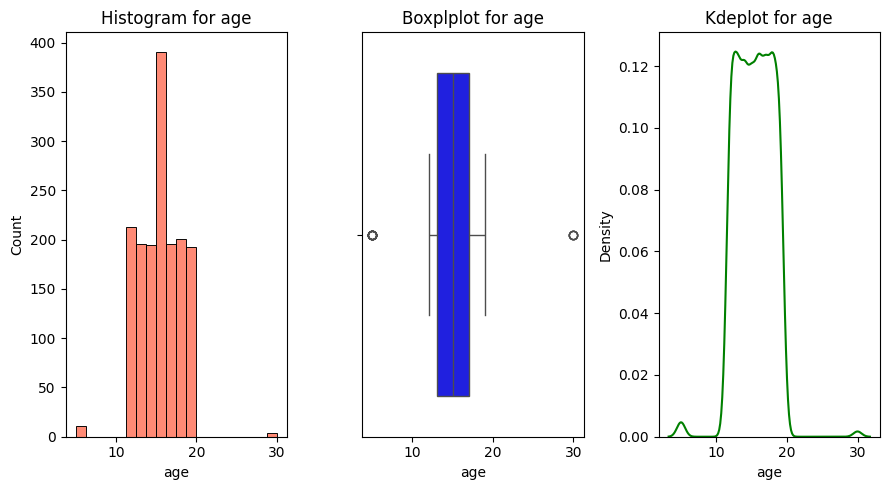

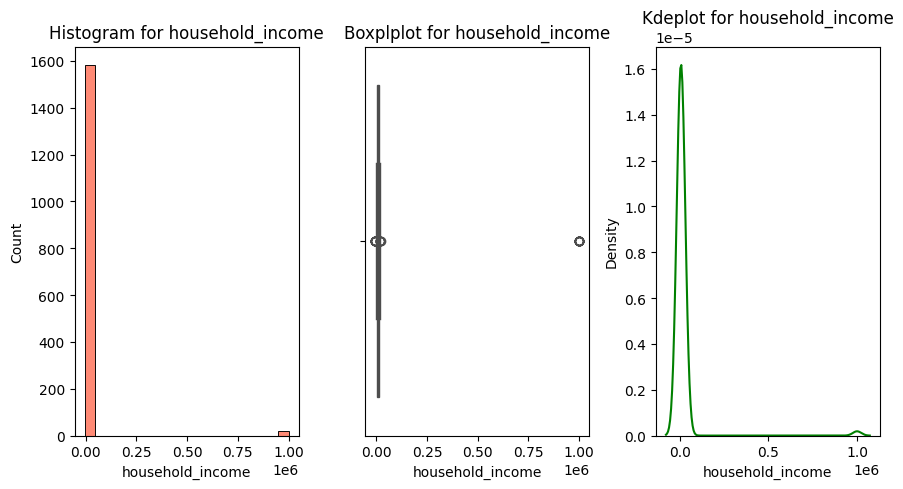

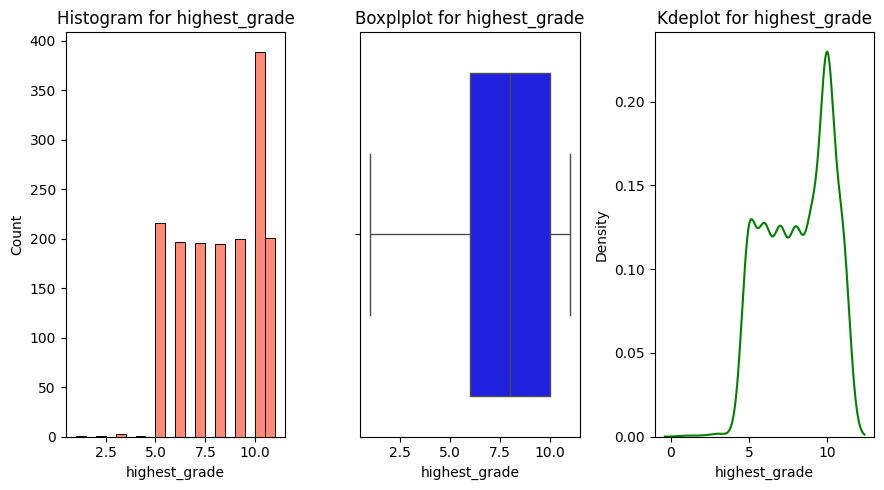

In [113]:
#EDA on numerical columns
for element in num_cols:
    plt.figure(figsize=(9,5))
    plt.subplot(1,3,1)
    sns.histplot(data=df_train,x=element,bins=20,color='tomato')
    plt.title(f'Histogram for {element}')
    plt.xlabel(element)
    plt.tight_layout()

    plt.subplot(1,3,2)
    sns.boxplot(data=df_train,x=element,color='blue')
    plt.title(f'Boxplplot for {element}')
    plt.xlabel(element)
    plt.tight_layout()

    plt.subplot(1,3,3)
    sns.kdeplot(data=df_train,x=element,color='green')
    plt.title(f'Kdeplot for {element}')
    plt.xlabel(element)
    plt.tight_layout()

    plt.show()

/tmp/ipython-input-1854536468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x=element,palette='tab10')


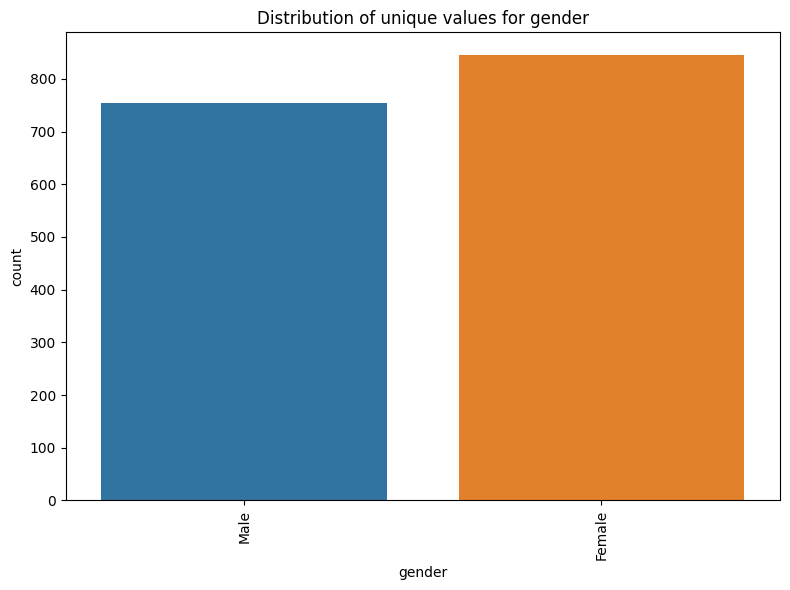

/tmp/ipython-input-1854536468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x=element,palette='tab10')


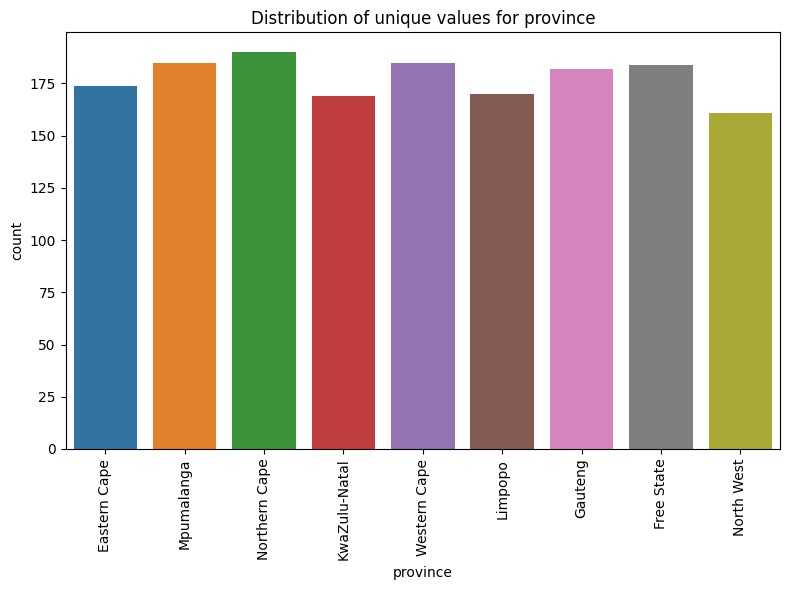

/tmp/ipython-input-1854536468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x=element,palette='tab10')


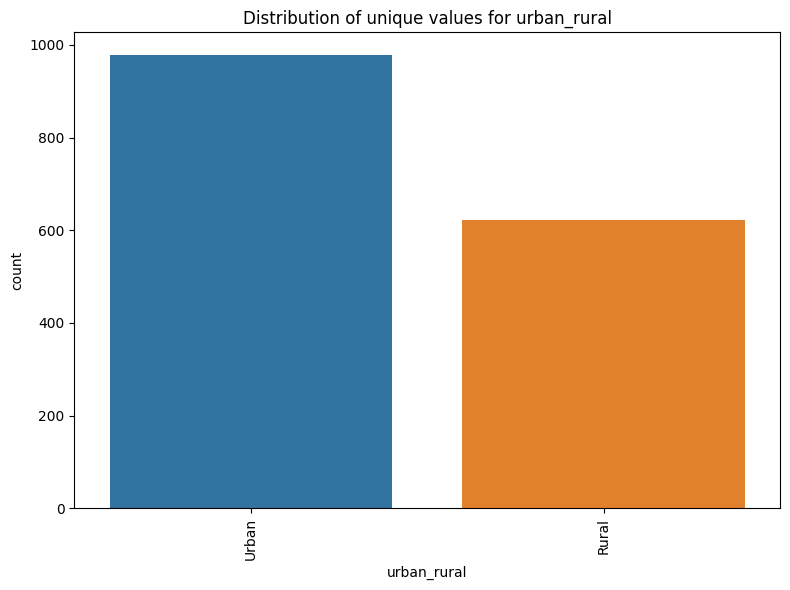

/tmp/ipython-input-1854536468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x=element,palette='tab10')


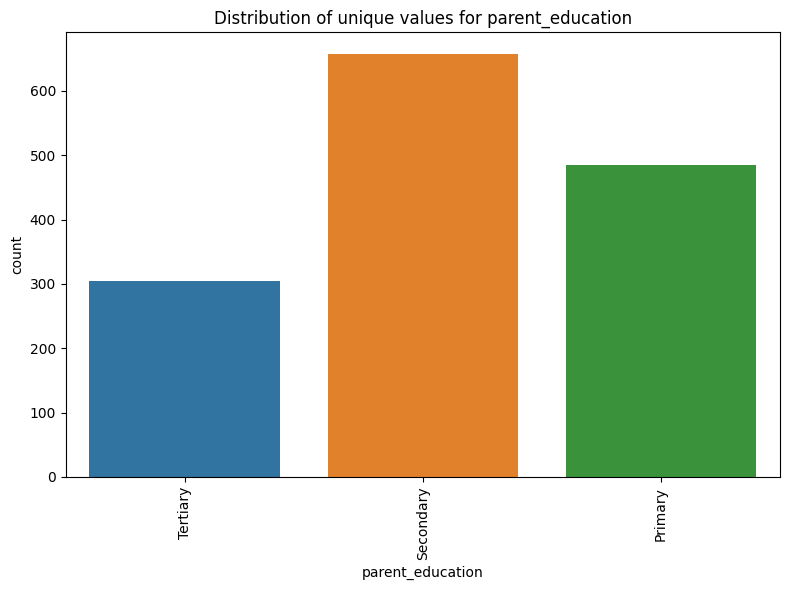

/tmp/ipython-input-1854536468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x=element,palette='tab10')


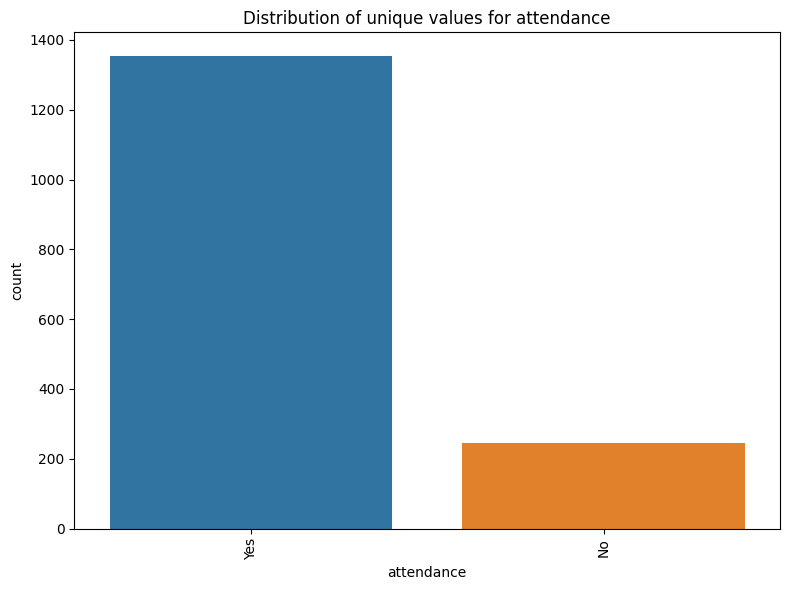

In [114]:
#EDA on Categorical columns
for element in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df_train,x=element,palette='tab10')
    plt.title(f'Distribution of unique values for {element}')
    plt.xticks(rotation=90)
    plt.xlabel(element)
    plt.tight_layout()
    plt.show()

In [115]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression

#Clause put in here because these are the only columns where there can be outliers
#If highest_grade is > 12 then drop that row/(s)
outlier_cols = ['age', 'household_income']

def cat_imputer(df, cat_cols):
    for x in cat_cols:
        if df[x].isna().sum() > 0:
            if x == 'gender':
                df[x].fillna(df[x].mode()[0], inplace=True)
                print('gender has been filled')
            elif x == 'province':
                df[x].fillna(df[x].mode()[0], inplace=True)
                print('province has been filled')
            elif x == 'urban_rural':
                df[x].fillna(df[x].mode()[0], inplace=True)
                print('urban_rural has been filled')
            elif x == 'parent_education':
                df[x].fillna('Missing', inplace=True)
                print('parent_education has been filled')
            elif x == 'attendance':
                df[x] = np.where(df['dropout'] == 1, df[x].fillna('No'), df[x].fillna('Yes'))
                print('attendance has been filled')
            else:
                print(f'{x}: No specific rule applied, skipped.')
        else:
            print(f'{x}: No imputation needed')
    print(' Imputation successful')
    return df

df_train =  cat_imputer(df_train,cat_cols)

iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(df_train[outlier_cols])
df_train['is_outlier'] = (iso.predict(df_train[outlier_cols]) == -1).astype(int)

X_train = df_train.drop('dropout',axis=1)
y_train = df_train['dropout']



gender: No imputation needed
province: No imputation needed
urban_rural: No imputation needed
parent_education has been filled
attendance: No imputation needed
 Imputation successful


/tmp/ipython-input-4238026206.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna('Missing', inplace=True)


In [116]:
nums = ['age', 'household_income','is_outlier']

num_pipeline = Pipeline([
     ('imputer', IterativeImputer(estimator=RandomForestRegressor(), random_state=42)),
        ('scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
 ])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, nums),
    ('cat', cat_pipeline, cat_cols)
], verbose_feature_names_out=True)


Training fold 1...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8353 - loss: 0.6503 - val_accuracy: 0.8975 - val_loss: 0.6002
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8643 - loss: 0.6631 - val_accuracy: 0.9275 - val_loss: 0.5723
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9158 - loss: 0.6012 - val_accuracy: 0.9400 - val_loss: 0.5235
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9352 - loss: 0.5940 - val_accuracy: 0.9500 - val_loss: 0.4726
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9388 - loss: 0.5314 - val_accuracy: 0.9550 - val_loss: 0.4161
Training fold 2...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2330 - loss: 0.7047 - val_accuracy: 0.4200 - val_loss: 0.7179
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5204 - loss: 0.6627 - val_accuracy: 0.6975 - val_loss: 0.6579
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7512 - loss: 0.6354 - val_accuracy: 0.8275 - val_loss: 0.6128
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8864 - loss: 0.5910 - val_accuracy: 0.9100 - val_loss: 0.5716
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9378 - loss: 0.5613 - val_accuracy: 0.9300 - val_loss: 0.5302
Training fold 3...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8886 - loss: 0.6524 - val_accuracy: 0.8900 - val_loss: 0.5435
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8717 - loss: 0.6689 - val_accuracy: 0.8850 - val_loss: 0.5160
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8817 - loss: 0.6045 - val_accuracy: 0.9000 - val_loss: 0.4757
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8953 - loss: 0.5931 - val_accuracy: 0.9150 - val_loss: 0.4264
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9279 - loss: 0.5327 - val_accuracy: 0.9275 - val_loss: 0.3706
Training fold 4...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7582 - loss: 0.7023 - val_accuracy: 0.7825 - val_loss: 0.6412
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7961 - loss: 0.7093 - val_accuracy: 0.8300 - val_loss: 0.6308
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8589 - loss: 0.6750 - val_accuracy: 0.8875 - val_loss: 0.6108
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8878 - loss: 0.6590 - val_accuracy: 0.9175 - val_loss: 0.5802
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9264 - loss: 0.6254 - val_accuracy: 0.9375 - val_loss: 0.5403


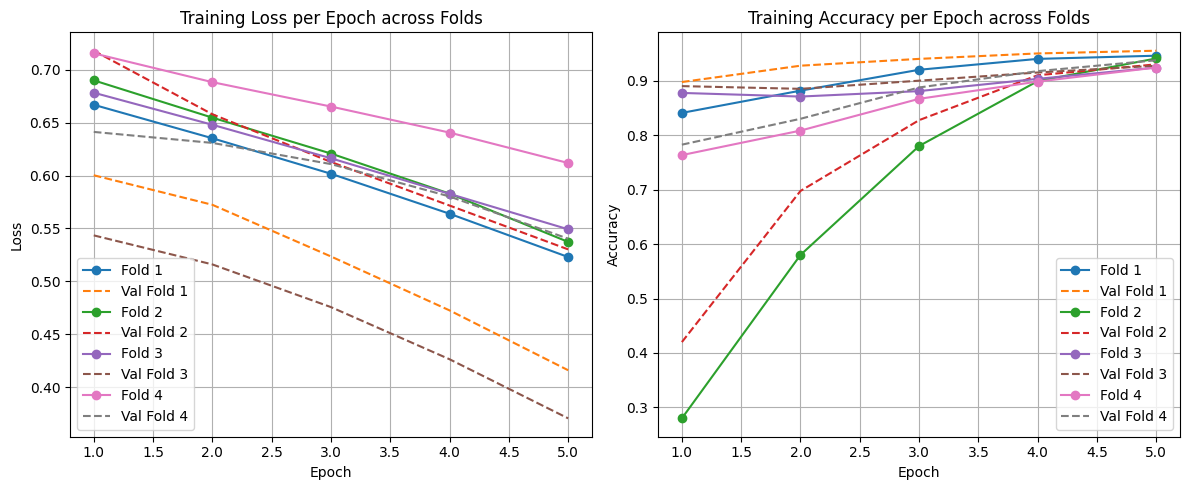

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import compute_class_weight
from sklearn.base import clone
from tensorflow.keras import backend as K

num_folds = 4
batch_size = 150
epochs = 5

loss_per_fold = []
accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in skf.split(X_train, y_train):
    print(f"Training fold {fold_no}...")
    K.clear_session()  # reset model state

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Clone preprocessor to avoid leakage
    preprocessor_fold = clone(preprocessor)
    X_train_processed = preprocessor_fold.fit_transform(X_train_fold)
    X_test_processed = preprocessor_fold.transform(X_test_fold)

    input_dim = X_train_processed.shape[1]

    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Handle class imbalance if present
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))

    history = model.fit(
        X_train_processed,
        y_train_fold,
        validation_data=(X_test_processed, y_test_fold),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        class_weight=class_weights
    )

    loss_per_fold.append(history.history['loss'])
    accuracy_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    val_accuracy_per_fold.append(history.history['val_accuracy'])

    fold_no += 1

# Convert to arrays for plotting
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(num_folds):
    plt.plot(epochs_range, loss_per_fold[i], marker='o', label=f'Fold {i+1}')
    plt.plot(epochs_range, val_loss_per_fold[i], linestyle='--', label=f'Val Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch across Folds')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(num_folds):
    plt.plot(epochs_range, accuracy_per_fold[i], marker='o', label=f'Fold {i+1}')
    plt.plot(epochs_range, val_accuracy_per_fold[i], linestyle='--', label=f'Val Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch across Folds')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [120]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

input_dim = X_train_preprocessed.shape[1]

model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.fit(
        X_train_preprocessed,
        y_train,
        epochs=10,
        batch_size=batch_size,
        verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8065 - loss: 0.5996
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8879 - loss: 0.4773 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.3857 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.3303 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8788 - loss: 0.2890 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.2565 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8768 - loss: 0.2389 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.2070 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8939 - loss: 0.1818 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9236 - loss: 0.1482 


In [122]:
df_test.loc[df_test['attendance'] == 'Yes', 'dropout'] = 0
df_test.loc[(df_test['age'] == 19), 'highest_grade'] = 10 #The most frequent grade for a 19 year old in south africa is grade 11
df_test.loc[(df_test['age'] == 18), 'highest_grade'] = 11
df_test.loc[(df_test['age'] == 17), 'highest_grade'] = 10
df_test.loc[(df_test['age'] == 16), 'highest_grade'] = 9
df_test.loc[(df_test['age'] == 15), 'highest_grade'] = 8
df_test.loc[(df_test['age'] == 14), 'highest_grade'] = 7
df_test.loc[(df_test['age'] == 13), 'highest_grade'] = 6
df_test.loc[(df_test['age'] == 12), 'highest_grade'] = 5
df_test.loc[(df_test['age'] == 11), 'highest_grade'] = 4
df_test.loc[(df_test['age'] == 10), 'highest_grade'] = 3
df_test.loc[(df_test['age'] == 9), 'highest_grade'] = 2
df_test.loc[(df_test['age'] == 8), 'highest_grade'] = 1

df_test['highest_grade'] = np.where(
    df_test['highest_grade'] > df_test['age'].map(age_grade_map),
    df_test['age'].map(age_grade_map),  # replace with max grade for that age
    df_test['highest_grade']          # leave as is
)

if df_test.duplicated().sum() > 0:
  df_test.drop_duplicates(inplace=True)
  print('Duplicates dropped')

df_test = df_test.reset_index(drop=True)

df_test = cat_imputer(df_test,cat_cols)

iso.predict(df_test[outlier_cols])
df_test['is_outlier'] = (iso.predict(df_test[outlier_cols]) == -1).astype(int)

X_test = df_test.drop('dropout', axis = 1)
y_test = df_test['dropout']
X_test_processed = preprocessor.transform(X_test)

Duplicates dropped
gender: No imputation needed
province: No imputation needed
urban_rural: No imputation needed
parent_education has been filled
attendance has been filled
 Imputation successful


/tmp/ipython-input-4238026206.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna('Missing', inplace=True)


In [129]:
preds = model.predict(X_test_processed)
y_pred_class = (preds > 0.5).astype(int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, preds)

In [131]:
print(acc)
print(prec)
print(rec)
print(f1)
print(roc_auc)

0.9263157894736842
1.0
0.5555555555555556
0.7142857142857143
0.9956436833408442


In [132]:
# Extract feature names from the preprocessor
clean_feature_names = preprocessor.get_feature_names_out()

# Clean up feature names by removing the datatype prefix
cleaned_feature_names = [name.split('__', 1)[1] if '__' in name else name for name in clean_feature_names]

print("Extracted and cleaned feature names:", cleaned_feature_names)

Extracted and cleaned feature names: ['age', 'household_income', 'is_outlier', 'gender_Female', 'gender_Male', 'province_Eastern Cape', 'province_Free State', 'province_Gauteng', 'province_KwaZulu-Natal', 'province_Limpopo', 'province_Mpumalanga', 'province_North West', 'province_Northern Cape', 'province_Western Cape', 'urban_rural_Rural', 'urban_rural_Urban', 'parent_education_Missing', 'parent_education_Primary', 'parent_education_Secondary', 'parent_education_Tertiary', 'attendance_No', 'attendance_Yes']


In [133]:
import shap
import pandas as pd

# Calculate SHAP values using DeepExplainer
# Using a sample of the training data as the background dataset for the explainer
# Using a sample of the processed test data for calculating SHAP values for efficiency
explainer = shap.DeepExplainer(model,X_train_preprocessed[:1200])
shap_values = explainer.shap_values(X_test_processed[:320])

# Create a DataFrame with proper feature names for plotting
# Note: We are using X_test here before preprocessing to get the original data structure for display purposes in some plots,
# but SHAP values correspond to the processed data.
# For summary_plot and beeswarm_plot, using a DataFrame of the processed data with feature names is required.
X_test_processed_for_plotting = pd.DataFrame(X_test_processed[:320], columns=cleaned_feature_names)


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(1200, 22))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(2400, 22))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(320, 22))']
  warnings

In [134]:
print("SHAP values shape:", shap_values.shape)
print("X_test DataFrame shape:", X_test_processed_for_plotting.shape)


SHAP values shape: (320, 22, 1)
X_test DataFrame shape: (320, 22)


In [135]:
# Remove the singleton dimension
shap_values_squeezed = shap_values.squeeze(axis=2)

print("New SHAP values shape:", shap_values_squeezed.shape)
# Should now be (320, 22)


New SHAP values shape: (320, 22)


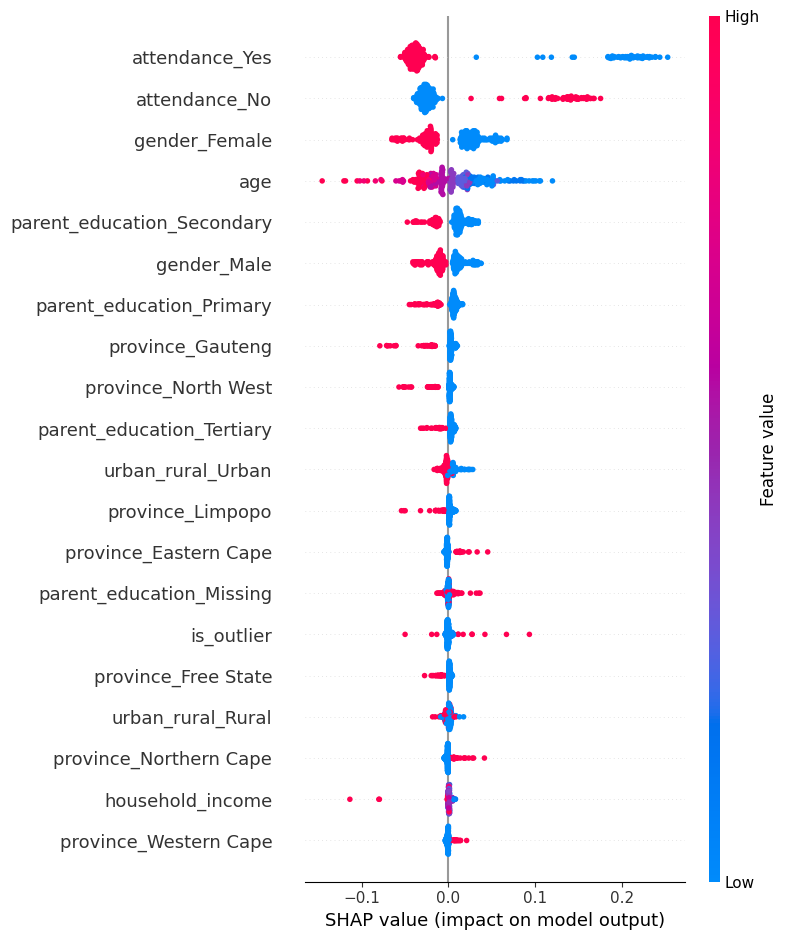

In [136]:
import shap

shap.summary_plot(shap_values_squeezed, X_test_processed_for_plotting)


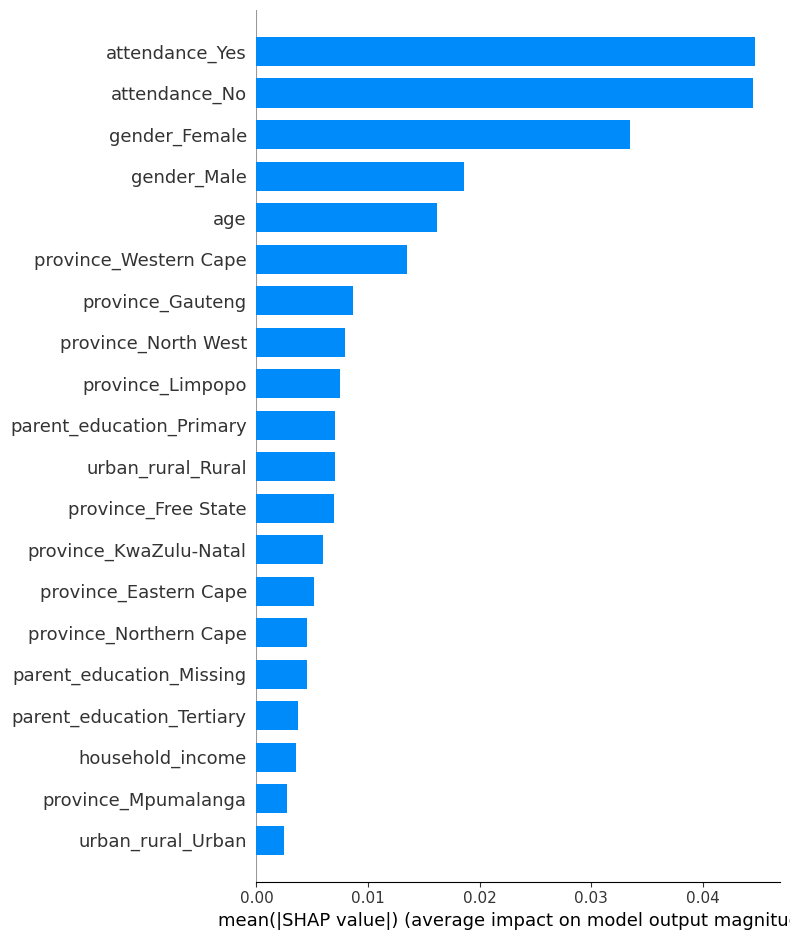

In [93]:
shap.summary_plot(
    shap_values_squeezed,
    X_test_processed_for_plotting,
    plot_type='bar'
)